In [7]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 527.3 kB/s eta 0:00:00a 0:00:01
  Using cached tqdm-4.66.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.0/291.0 kB 854.4 kB/s eta 0:00:00a 0:00:01
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)


In [8]:
!pip install textblob


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 5.1 MB/s eta 0:00:00a 0:00:01


In [10]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 139.3 kB/s eta 0:00:00a 0:00:01


In [19]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.8 MB/s eta 0:00:00
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 2.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 2.6 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)


In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [4]:
df = pd.read_json('@informs_tweets.json')

In [5]:
df

,id,text
0,1725386586521747636,RT @KirkDBorne: A Gentle Introduction to #Opti...
1,1725383475430035695,RT @INFORMS: The Associate Certified Analytics...
2,1725372605048213891,@MatthewALanham @INFORMS @PurdueBizGrad 👏🏻 👏🏻 ...
3,1725371364280824001,RT @KirkDBorne: A Gentle Introduction to #Opti...
4,1725362789059887292,RT @KirkDBorne: A Gentle Introduction to #Opti...
5,1725352341677940978,RT @MatthewALanham: The @INFORMS #UPS George D...
6,1725324436918653113,The @INFORMS #UPS George D. Smith Prize arrive...
7,1725316363000971559,RT @KirkDBorne: A Gentle Introduction to #Opti...
8,1725315002737844503,RT @KirkDBorne: A Gentle Introduction to #Opti...
9,1725284784161865949,RT @LBS: LBS’s @ramdask is the winner of the @...


In [6]:
text_df = df.drop(['id'], axis=1)
text_df.head()

,text
0,RT @KirkDBorne: A Gentle Introduction to #Opti...
1,RT @INFORMS: The Associate Certified Analytics...
2,@MatthewALanham @INFORMS @PurdueBizGrad 👏🏻 👏🏻 ...
3,RT @KirkDBorne: A Gentle Introduction to #Opti...
4,RT @KirkDBorne: A Gentle Introduction to #Opti...


In [7]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [8]:
text_df.text = text_df['text'].apply(data_processing)

In [9]:
text_df = text_df.drop_duplicates('text')

In [10]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [11]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [12]:
text_df.head()

,text
0,rt kirkdborne gentle introduction optimization...
1,rt informs associate certified analytics profe...
2,matthewalanham informs purduebizgrad big week
5,rt matthewalanham informs ups george smith pri...
6,informs ups george smith prize arrived today h...


In [13]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [14]:

text_df['polarity'] = text_df['text'].apply(polarity)

In [15]:
text_df.head()

,text,polarity
0,rt kirkdborne gentle introduction optimization...,0.200000
1,rt informs associate certified analytics profe...,0.233333
2,matthewalanham informs purduebizgrad big week,0.000000
5,rt matthewalanham informs ups george smith pri...,0.000000
6,informs ups george smith prize arrived today h...,0.000000


In [16]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [17]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [18]:
text_df.head()

,text,polarity,sentiment
0,rt kirkdborne gentle introduction optimization...,0.200000,Positive
1,rt informs associate certified analytics profe...,0.233333,Positive
2,matthewalanham informs purduebizgrad big week,0.000000,Neutral
5,rt matthewalanham informs ups george smith pri...,0.000000,Neutral
6,informs ups george smith prize arrived today h...,0.000000,Neutral


In [19]:
text_df = text_df.drop_duplicates('text')

<Axes: xlabel='sentiment', ylabel='count'>

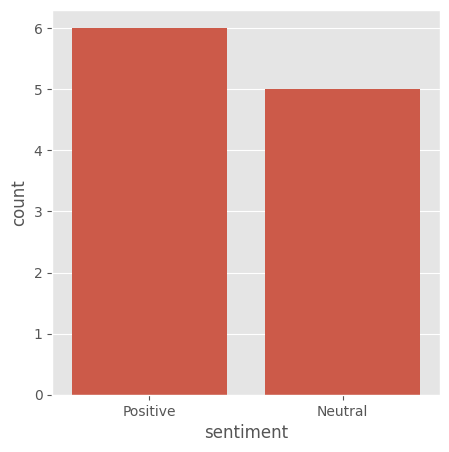

In [20]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

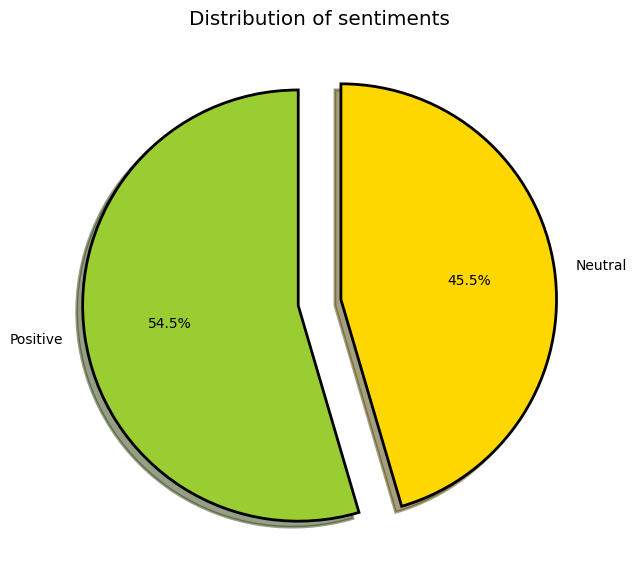

In [21]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [22]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
9,rt lbs lbss ramdask winner informs times disti...,0.500000,Positive
1,rt informs associate certified analytics profe...,0.233333,Positive
0,rt kirkdborne gentle introduction optimization...,0.200000,Positive
12,apprenticeships internships associatelevel cer...,0.200000,Positive
10,anthony chong ceo ai ml modeling expert ikasi ...,0.100000,Positive


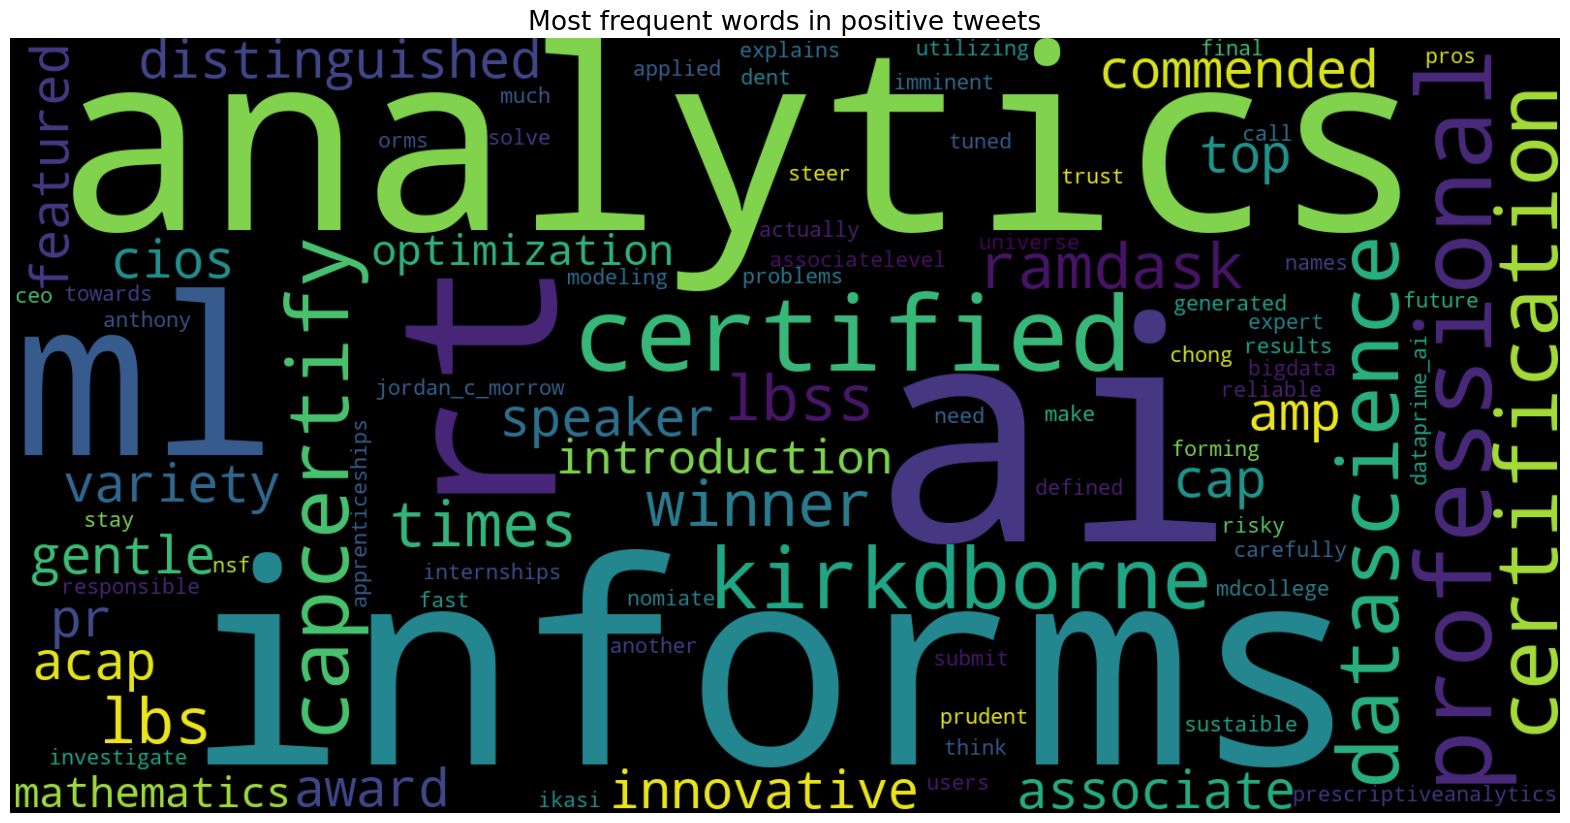

In [23]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [24]:
text_df

,text,polarity,sentiment
0,rt kirkdborne gentle introduction optimization...,0.200000,Positive
1,rt informs associate certified analytics profe...,0.233333,Positive
2,matthewalanham informs purduebizgrad big week,0.000000,Neutral
5,rt matthewalanham informs ups george smith pri...,0.000000,Neutral
6,informs ups george smith prize arrived today h...,0.000000,Neutral
9,rt lbs lbss ramdask winner informs times disti...,0.500000,Positive
10,anthony chong ceo ai ml modeling expert ikasi ...,0.100000,Positive
12,apprenticeships internships associatelevel cer...,0.200000,Positive
13,final call nomiate another make dent universe ...,0.066667,Positive
16,rt harveymudd mathematics professor susan mart...,0.000000,Neutral


In [53]:
# ... [other parts of the code are unchanged] ...

# Updated color function
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Check if the dataframe has the 'polarity' column
    if 'polarity' in df.columns:
        # Find the row with the text containing the word
        # and return the corresponding color based on 'polarity'
        for _, row in df.iterrows():
            if word in row['text'].split():  # Splitting the text to match individual words
                return "green" if row['polarity'] > 0 else "red"
    # Default color if word not found or 'polarity' column not present
    return "grey"

# ... [the rest of the code for generating and displaying the word cloud] ...


In [25]:
from collections import defaultdict

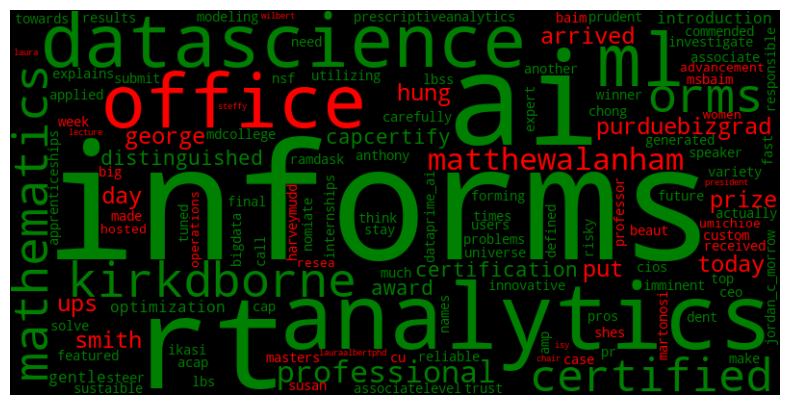

In [26]:
word_sentiment = defaultdict(list)
for _, row in text_df.iterrows():
    words = row['text'].split()
    for word in words:
        word_sentiment[word].append(row['polarity'])

# Calculate average sentiment for each word
word_avg_sentiment = {word: sum(sentiments) / len(sentiments) for word, sentiments in word_sentiment.items()}

# Define a function to determine the color of words in the word cloud
def color_func(word, **kwargs):
    return "green" if word_avg_sentiment.get(word, 0) > 0 else "red"

# Generate word cloud
text = ' '.join(text_df['text'])
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the generated image with the color function applied
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud.recolor(color_func=color_func), interpolation='bilinear')
plt.axis('off')
plt.show()

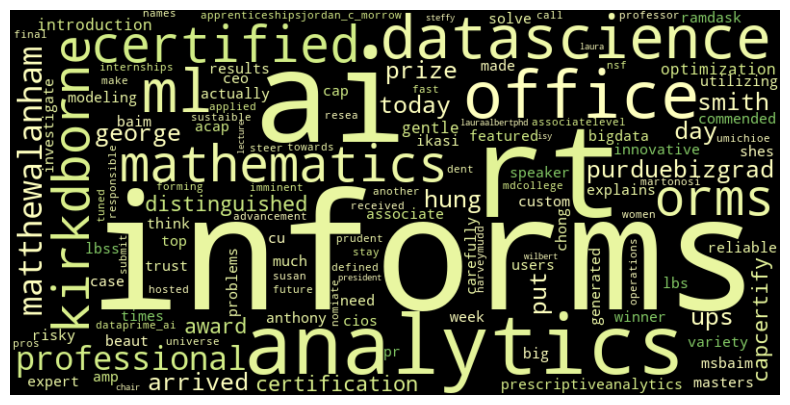

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
from matplotlib import colors as mcolors

# Tokenize the text and calculate the average polarity for each word
word_sentiment = defaultdict(list)
for _, row in text_df.iterrows():
    words = row['text'].split()
    for word in words:
        word_sentiment[word].append(row['polarity'])

# Calculate average sentiment for each word
word_avg_sentiment = {word: sum(sentiments) / len(sentiments) for word, sentiments in word_sentiment.items()}

# Define a function to determine the color of words in the word cloud
def color_func(word, **kwargs):
    sentiment = word_avg_sentiment.get(word, 0)
    # Normalize the sentiment score to be between 0 and 1 for the color map
    norm_sentiment = (sentiment + 1) / 2
    # Get the color from the RdYlGn color map
    rgba_color = plt.cm.RdYlGn(norm_sentiment)
    # Convert the RGBA color to hex format
    return mcolors.rgb2hex(rgba_color)

# Generate word cloud
text = ' '.join(text_df['text'])
wordcloud = WordCloud(width=800, height=400, color_func=color_func).generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


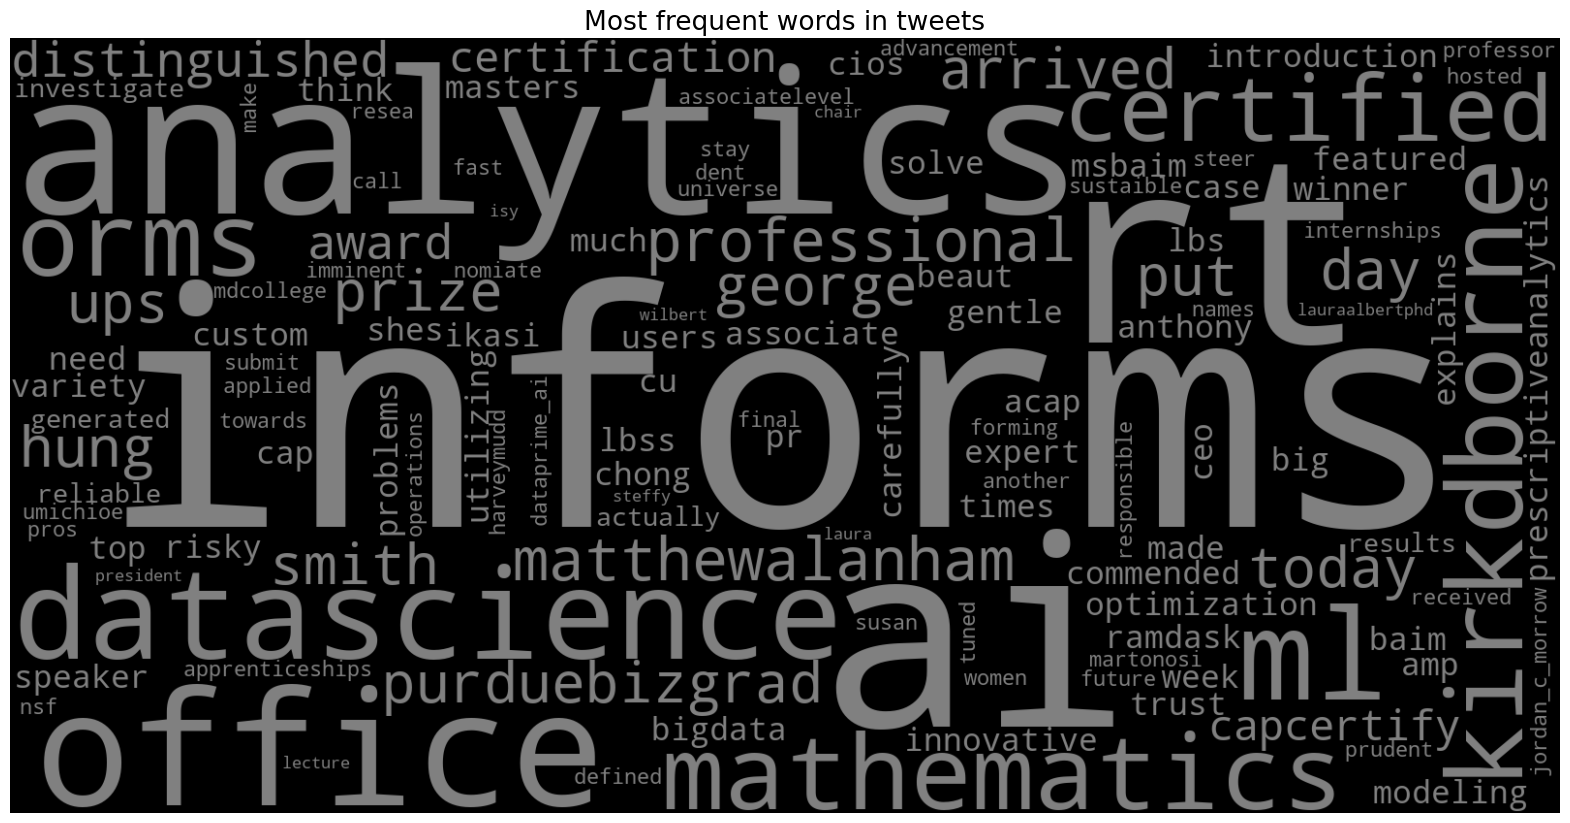

In [56]:


# Join all the texts in the dataframe
text = ' '.join(word for word in text_df['text'])

# Create a word cloud object
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)

# Display the generated image with the color function applied
plt.figure(figsize=(20,15), facecolor='None')
plt.imshow(wordcloud.recolor(color_func=color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.title('Most frequent words in tweets', fontsize=19)
plt.show()


In [43]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
4,mariuszoican informs congratulations,0.0,Neutral
6,rt informs informs member minute 2023 informs ...,0.0,Neutral
8,paper trading gamification accepted management...,0.0,Neutral
13,rt informs datadriven optimization enhancing c...,0.0,Neutral


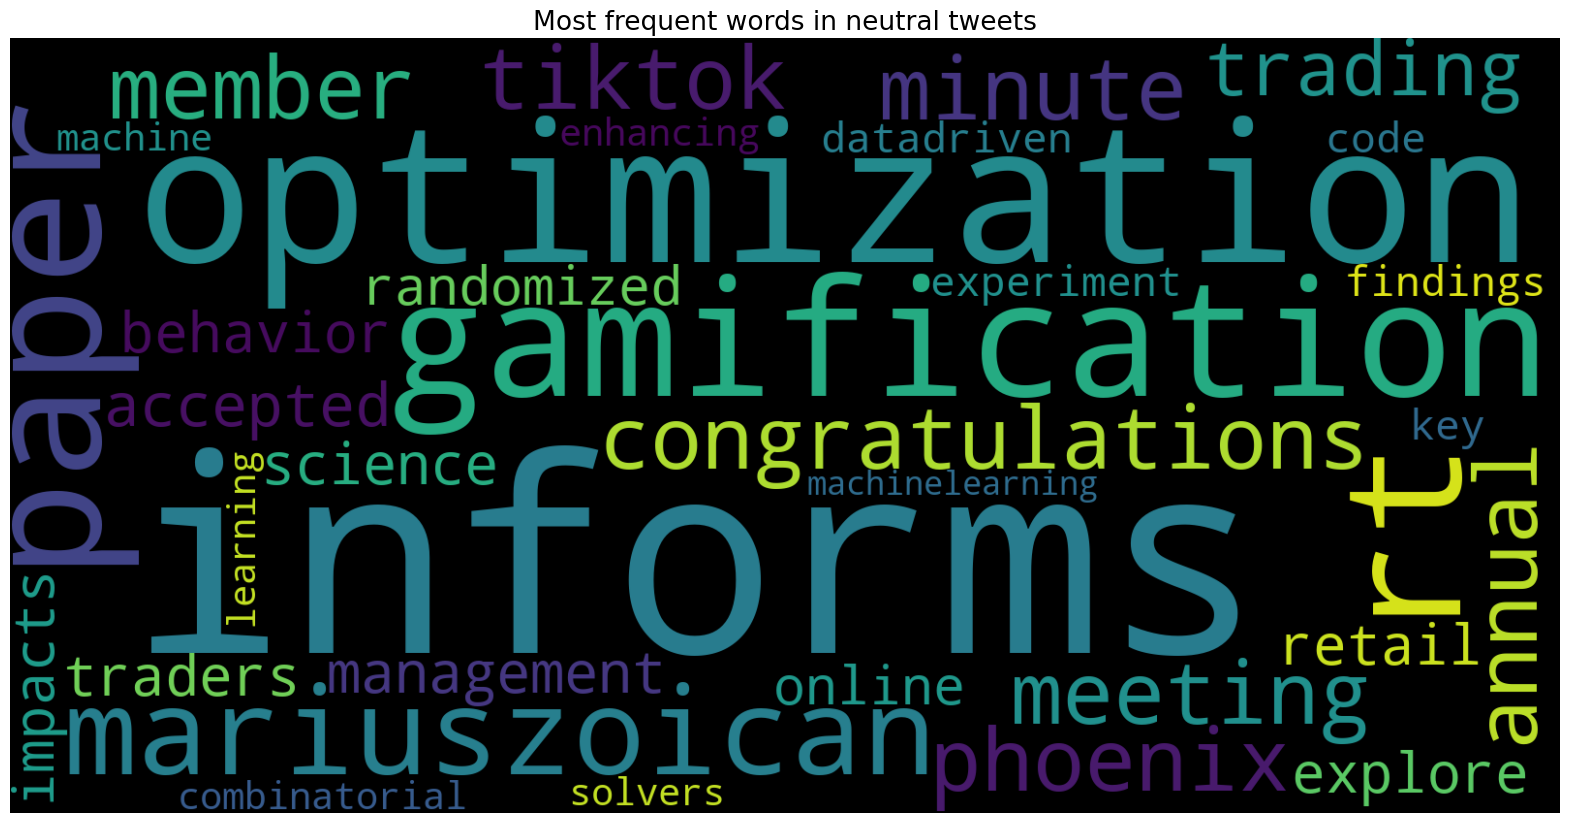

In [44]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()